# Dataset yang digunakan adalah Boston House Pricing Dataset
Boston House Pricing adalah salah satu dataset yang terkenal pada Machine Learning selain Titanic, dana Iris dataset. Hal yang akan diprediksi dari dataset ini adalah `harga rumah`

## Import Data

In [2]:
import numpy as np
import pandas as pd

In [3]:
from google.colab import files 
import io 


uploaded = files.upload()

Saving house_price.csv to house_price.csv


In [5]:
df = pd.read_csv(io.BytesIO(uploaded['house_price.csv']), index_col="ID") 
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
ID,,,,,,,,,,,,,,
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


## Plot Missing Value

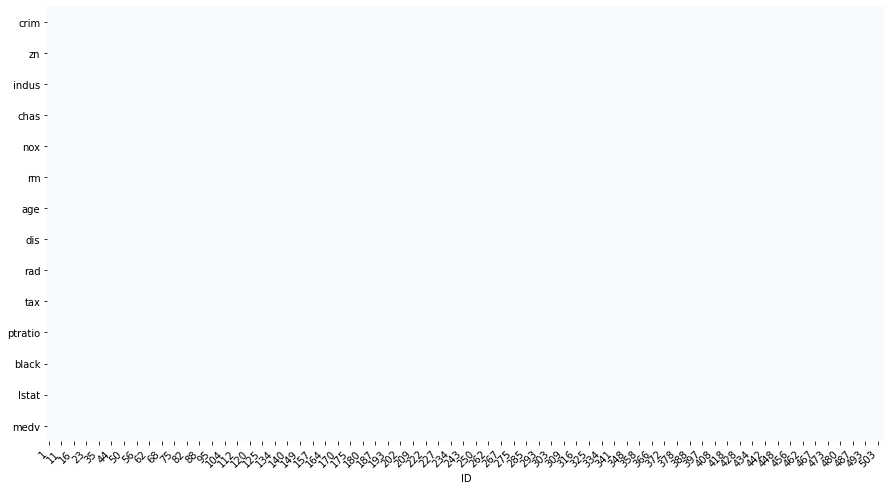

In [7]:
from jcopml.plot import plot_missing_value

plot_missing_value(df)

Tidak ada data yang bernilai kosong / NaN

# Dataset Spliting

Kolom yang menjadi target adalah `medv`

In [9]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["medv"])
y = df.medv

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((266, 13), (67, 13), (266,), (67,))

## Preprocessing
Untuk algoritma yang berbasis tree salah satunya Random Forest, scaling tidak berpengaruh. Jadi menerapkan scaling maupung tidak, itu tidak masalah

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from jcopml.pipeline import num_pipe, cat_pipe
from sklearn.ensemble import RandomForestRegressor

preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ['crim', 'zn', 'indus','nox', 'rm', 'age', 'dis', 'rad', 'tax',
                            'ptratio', 'black', 'lstat']),
    ('categoric', cat_pipe(), ["chas"])
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', RandomForestRegressor(n_jobs=-1, random_state=42))
    
])

## Tunning dan Pemodelan
Algoritma yang digunakan adalah Random Forest untuk yang Regressor, karena kolom target bertipe data numerik

In [16]:
from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp


model = GridSearchCV(pipeline, gsp.rf_params, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   50.1s
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:  1.0min finished


{'algo__max_depth': 20, 'algo__max_features': 0.8, 'algo__min_samples_leaf': 1, 'algo__n_estimators': 200}
0.9792501376222507 0.8426800125439895 0.9152634957155961


### Score untuk model adalah 91%
### Pemodelan dapat dikategorikan cukup bagus, karena tembus 90%